<a href="https://colab.research.google.com/github/JUPUDI-VAMSI-KALYAN/Data_Science-Projects-Python-/blob/master/Clustering%20of%20various%20places%20of%20interst%20in%20south%20india.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving buddymove_holidayiq.csv to buddymove_holidayiq.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df=pd.read_csv('buddymove_holidayiq.csv',index_col='User Id')

In [10]:
df.head()

,Sports,Religious,Nature,Theatre,Shopping,Picnic
User Id,,,,,,
User 1,2,77,79,69,68,95
User 2,2,62,76,76,69,68
User 3,2,50,97,87,50,75
User 4,2,68,77,95,76,61
User 5,2,98,54,59,95,86


In [8]:
df.shape
    

(249, 7)

In [11]:
df.isnull().sum()

Sports       0
Religious    0
Nature       0
Theatre      0
Shopping     0
Picnic       0
dtype: int64

In [12]:
df.describe()

,Sports,Religious,Nature,Theatre,Shopping,Picnic
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,11.987952,109.779116,124.518072,116.377510,112.638554,120.401606
std,6.616501,32.454115,45.639372,32.132696,41.562888,32.633339
min,2.000000,50.000000,52.000000,59.000000,50.000000,61.000000
25%,6.000000,84.000000,89.000000,93.000000,79.000000,92.000000
50%,12.000000,104.000000,119.000000,113.000000,104.000000,119.000000
75%,18.000000,132.000000,153.000000,138.000000,138.000000,143.000000
max,25.000000,203.000000,318.000000,213.000000,233.000000,218.000000


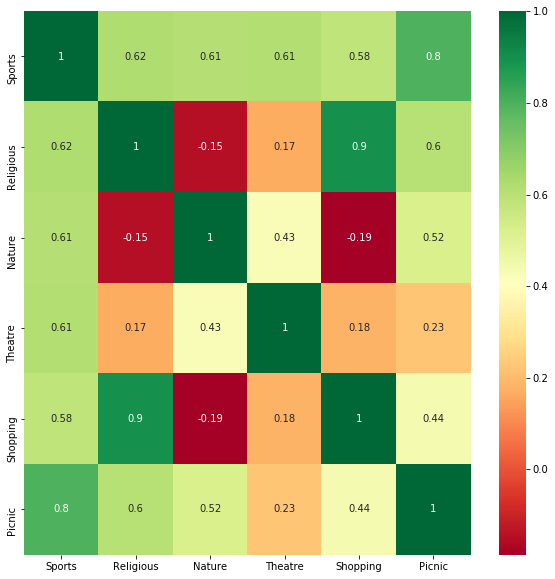

In [15]:
cormat = df.corr()
top_corr_features = cormat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

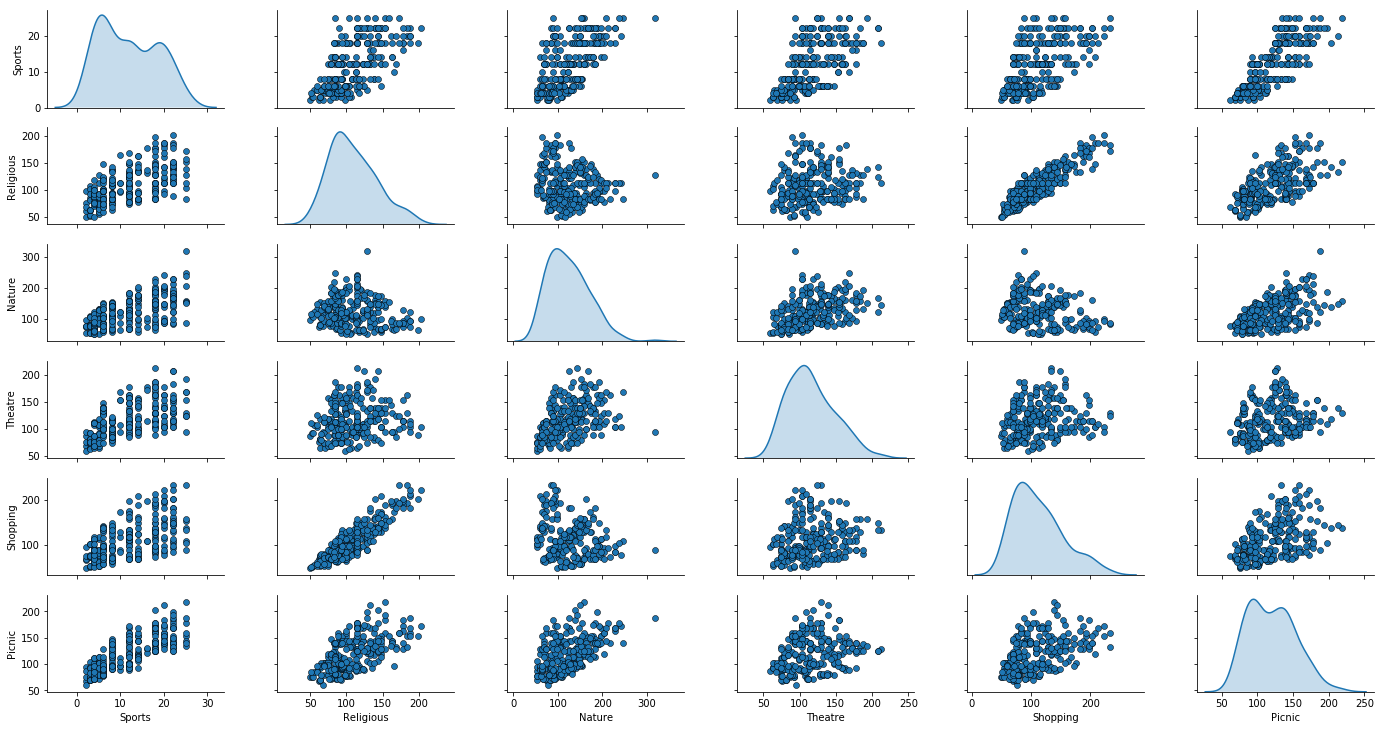

In [16]:
pp=sns.pairplot(df,height=1.8,aspect=1.8,
                plot_kws=dict(edgecolor="k",linewidth=0.5),
                diag_kind="kde", diag_kws=dict(shade=True))
fig = pp.fig
fig.subplots_adjust(top=0.93,wspace=0.3)

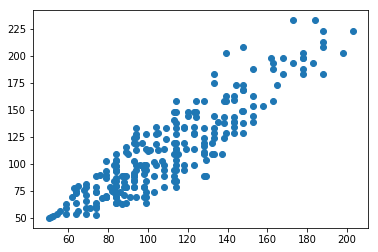

In [17]:
x=df['Religious']
y=df['Shopping']
plt.scatter(x,y)

plt.show()

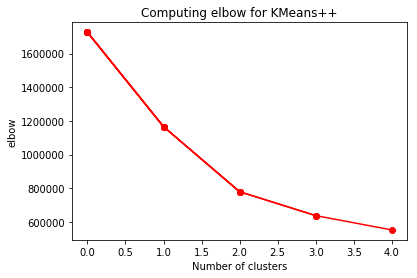

In [21]:
vals = df.iloc[:,1:].values
from sklearn.cluster import KMeans
elbow=[]
for i in range(1,6):
    km=KMeans(n_clusters=i,init="k-means++",n_init=10,max_iter=100)
    km.fit_predict(vals)
    elbow.append(km.inertia_)
    
plt.plot( elbow, 'ro-', label="ELBOW")
plt.title("Computing elbow for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("elbow")
plt.show()

In [24]:
km=KMeans(n_clusters=2)
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
    km=KMeans(n_clusters=3,n_init=10,max_iter=100)
    km.fit_predict(df)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1,
       1, 2, 1, 1, 0, 1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 2, 0, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

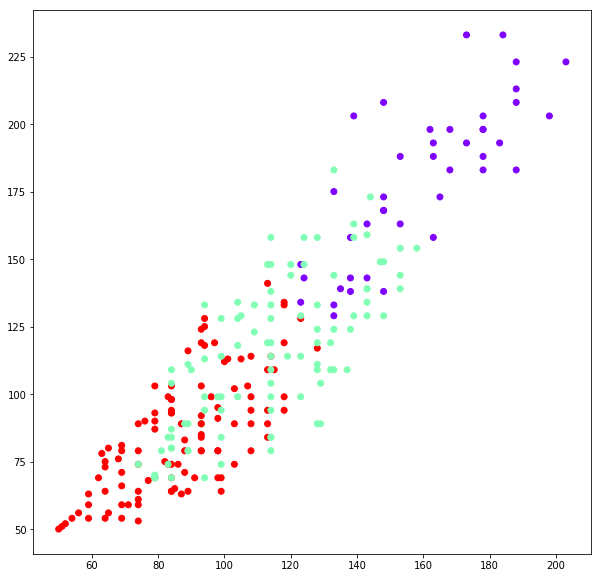

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(df['Religious'],df['Shopping'],c=km.labels_,cmap='rainbow')